In [1]:
import pandas as pd

In [2]:
online_retail = pd.read_excel('Online retail.xlsx',header = None)

In [3]:
online_retail.head(5)

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [4]:
online_retail.columns = ['items']

In [5]:
online_retail.head(5)

,items
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


## Transformation

x.split(',') → splits the string into individual items.

i.strip() → removes extra spaces.

set(...) → removes duplicates.

list(set(...)) → converts back to list format (for further processing).

In [6]:
transactions = online_retail['items'].dropna().apply(lambda x: list(set(i.strip() for i in str(x).split(','))))

In [7]:
transactions

0       [green grapes, antioxydant juice, olive oil, e...
1                              [burgers, eggs, meatballs]
2                                               [chutney]
3                                       [turkey, avocado]
4       [whole wheat rice, energy bar, green tea, milk...
                              ...                        
7496                    [fresh bread, light mayo, butter]
7497    [frozen vegetables, french fries, burgers, gre...
7498                                            [chicken]
7499                                [escalope, green tea]
7500    [low fat yogurt, yogurt cake, eggs, frozen smo...
Name: items, Length: 7501, dtype: object

In [8]:
from mlxtend.preprocessing import TransactionEncoder

df_te = TransactionEncoder()

In [9]:
df = df_te.fit(transactions).transform(transactions)

In [10]:
df

array([[ True,  True, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [11]:
data_apriori = pd.DataFrame(df, columns=df_te.columns_)

In [12]:
data_apriori

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_items = apriori(data_apriori, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1)

In [14]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
1,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113
2,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198
3,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,0.002779,1.018933
...,...,...,...,...,...,...,...,...,...
401,"(pancakes, mineral water)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,0.005593,1.251198
402,"(spaghetti, mineral water)",(pancakes),0.059725,0.095054,0.011465,0.191964,2.019529,0.005788,1.119933
403,(pancakes),"(spaghetti, mineral water)",0.095054,0.059725,0.011465,0.120617,2.019529,0.005788,1.069244
404,(spaghetti),"(pancakes, mineral water)",0.174110,0.033729,0.011465,0.065850,1.952333,0.005593,1.034385


In [15]:
frequent_items[frequent_items['itemsets'].apply(lambda x: len(x) == 1)].sort_values(by='support', ascending=False).head(20)

,support,itemsets
46,0.238368,(mineral water)
19,0.179709,(eggs)
63,0.174110,(spaghetti)
24,0.170911,(french fries)
13,0.163845,(chocolate)
32,0.132116,(green tea)
45,0.129583,(milk)
33,0.098254,(ground beef)
30,0.095321,(frozen vegetables)
53,0.095054,(pancakes)


In [16]:
frequent_items[frequent_items['itemsets'].apply(lambda x: len(x) == 2)].sort_values(by='support', ascending=False).head(20)

,support,itemsets
224,0.059725,"(spaghetti, mineral water)"
118,0.052660,"(chocolate, mineral water)"
144,0.050927,"(mineral water, eggs)"
209,0.047994,"(milk, mineral water)"
196,0.040928,"(mineral water, ground beef)"
200,0.039195,"(spaghetti, ground beef)"
124,0.039195,"(chocolate, spaghetti)"
148,0.036528,"(spaghetti, eggs)"
136,0.036395,"(french fries, eggs)"
177,0.035729,"(frozen vegetables, mineral water)"


In [17]:
top_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(20)
top_confidence_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
343,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
378,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552
319,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937
364,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136
272,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
400,"(pancakes, spaghetti)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557
394,"(olive oil, spaghetti)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954
389,"(spaghetti, milk)",(mineral water),0.035462,0.238368,0.015731,0.443609,1.861024,0.007278,1.368879
324,"(chocolate, milk)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,0.006340,1.349656
384,"(spaghetti, ground beef)",(mineral water),0.039195,0.238368,0.017064,0.435374,1.826477,0.007722,1.348914


In [18]:
rules_lift = rules[(rules['lift'] > 1) & (rules['confidence'] > 0.4)]
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
219,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
262,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962
268,(salmon),(mineral water),0.042528,0.238368,0.017064,0.401254,1.683336,0.006927,1.272045
272,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
307,"(chocolate, eggs)",(mineral water),0.033196,0.238368,0.013465,0.405622,1.701663,0.005552,1.281394
319,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937
324,"(chocolate, milk)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,0.006340,1.349656
336,"(chocolate, spaghetti)",(mineral water),0.039195,0.238368,0.015865,0.404762,1.698053,0.006522,1.279541
343,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
350,"(milk, eggs)",(mineral water),0.030796,0.238368,0.013065,0.424242,1.779778,0.005724,1.322834


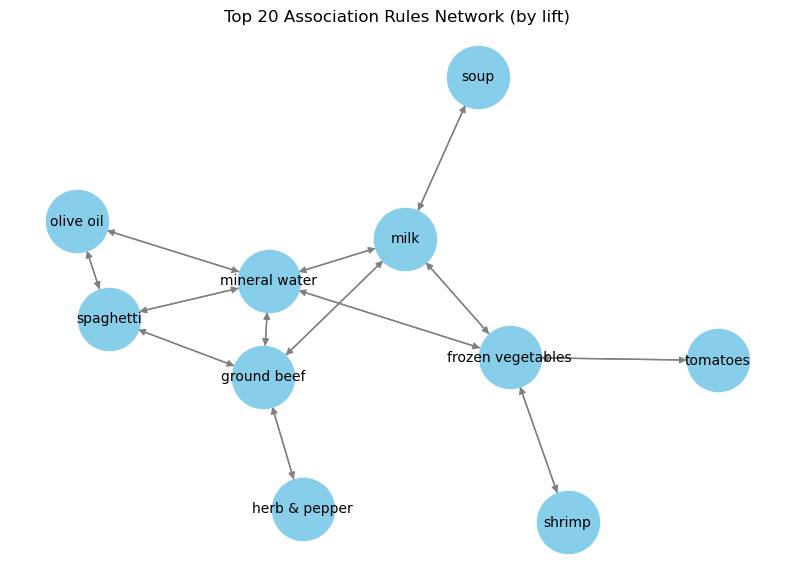

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_rules_network(rules, top_n=20):
    G = nx.DiGraph()

    # Sort by lift and select top rules
    top_rules = rules.sort_values(by='lift', ascending=False).head(top_n)

    for _, row in top_rules.iterrows():
        for antecedent in row['antecedents']:
            for consequent in row['consequents']:
                G.add_edge(str(antecedent), str(consequent), weight=row['lift'])

    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', node_size=2000, 
                     edge_color='gray', font_size=10, arrows=True)
    plt.title(f"Top {top_n} Association Rules Network (by lift)")
    plt.axis('off')
    plt.show()

plot_rules_network(rules)

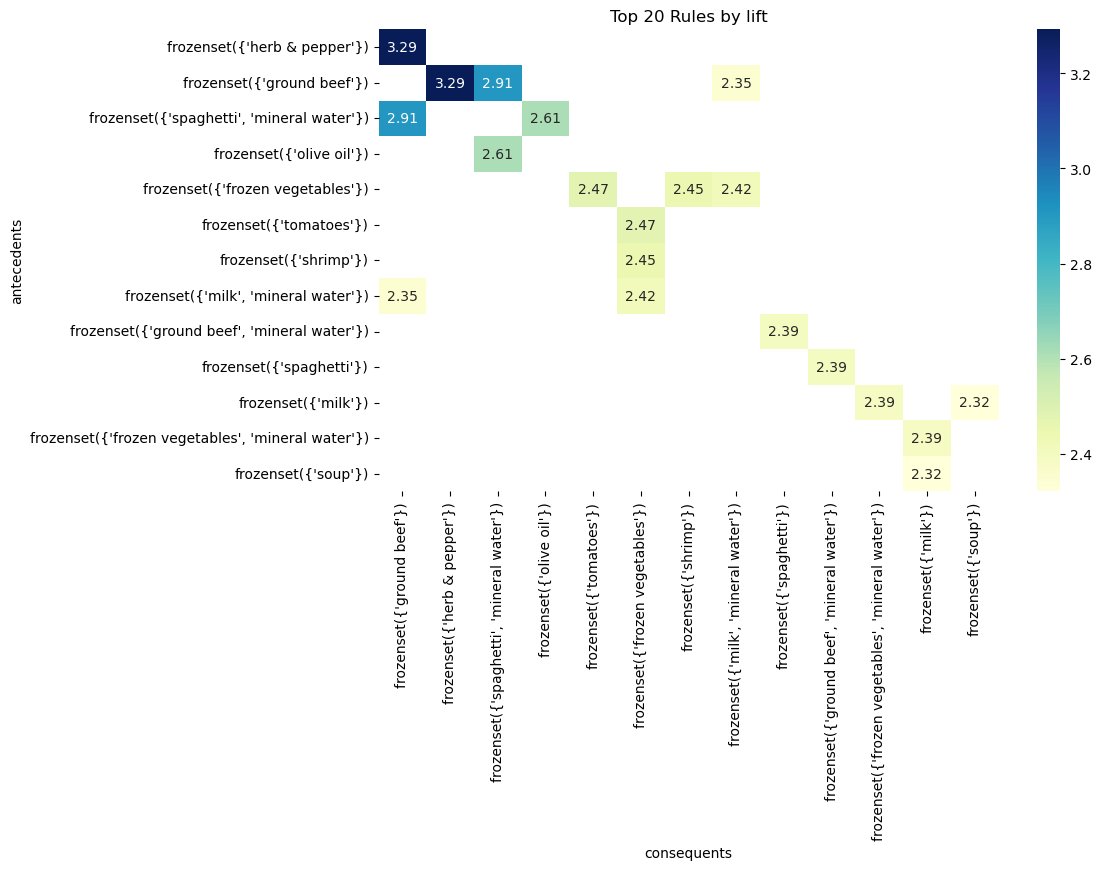

In [23]:
import seaborn as sns

def plot_rules_heatmap(rules, metric='lift', top_n=20):
    top = rules.sort_values(by=metric, ascending=False).head(top_n)
    matrix = top.pivot(index='antecedents', columns='consequents', values=metric)
    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f"Top {top_n} Rules by {metric}")
    plt.show()
plot_rules_heatmap(rules)

In [24]:
def remove_redundant_rules(rules):
    rules = rules.sort_values(by='lift', ascending=False)
    unique_rules = []
    for _, rule in rules.iterrows():
        is_redundant = False
        for selected in unique_rules:
            if rule['antecedents'].issubset(selected['antecedents']) and rule['consequents'] == selected['consequents']:
                is_redundant = True
                break
        if not is_redundant:
            unique_rules.append(rule)
    return pd.DataFrame(unique_rules)
remove_redundant_rules(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
214,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
215,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410
387,(ground beef),"(spaghetti, mineral water)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902
382,"(spaghetti, mineral water)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445
397,(olive oil),"(spaghetti, mineral water)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898
...,...,...,...,...,...,...,...,...,...
155,(low fat yogurt),(french fries),0.076523,0.170911,0.013332,0.174216,1.019340,0.000253,1.004003
131,(eggs),(olive oil),0.179709,0.065858,0.011998,0.066766,1.013783,0.000163,1.000973
130,(olive oil),(eggs),0.065858,0.179709,0.011998,0.182186,1.013783,0.000163,1.003029
144,(escalope),(spaghetti),0.079323,0.174110,0.013998,0.176471,1.013557,0.000187,1.002866


## Understandings 
1. Support - How often an itemset appears in the dataset.
2. Confidence - How often the rule has been found to be true.
3. Lift - How much more likely B is given A, compared to B being independent.

## Scale 

### Confidence 

Confidence tells you how reliable the rule is.

High confidence (closer to 1) = stronger rule

Low confidence (closer to 0) = weak or useless rule

### Lift


Lift = 1 ⇒ A and B are independent

Lift > 1 ⇒ A and B are positively correlated


1.	What is lift and why is it important in Association rules?

Lift tells us how much more likely two items are to occur together than if they were independent. A lift of 1 means the items appear together just by chance. A lift greater than 1 means the rule is useful — the items co-occur more often than expected. For example, if lift = 2 for "bread → butter", it means people who buy bread are twice as likely to buy butter than random chance. Lift is important because it helps you find strong and meaningful relationships in your data.

2.	What is support and Confidence. How do you calculate them?

Support tells you how often a combination of items appears in your entire dataset. For example, if 100 people shopped and 20 of them bought both bread and butter, then the support for "bread and butter" is 20 out of 100 — or 20%. It shows how common that combination is.

Confidence tells you how often item B is bought when item A is bought. So if 30 people bought bread, and out of those, 20 also bought butter, the confidence of "if bread, then butter" is 20 out of 30 — or about 67%. It shows how reliable the rule is.

3.	What are some limitations or challenges of Association rules mining?

One challenge is that it can produce too many rules, many of which are not useful or obvious (like “people who buy milk also buy bread”). Also, if you don't choose good thresholds for support and confidence, you may either miss important patterns or find meaningless ones. Another issue is that it only finds associations, not causal relationships — just because two items appear together doesn’t mean one causes the other. Lastly, it struggles with high-dimensional or sparse datasets where there are too many possible combinations.